**Project Aim** <br>
This notebooks is to apply Support Vector Machines to a Classification problem

We will develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. The problem as been reformatted as a binary classification problem.

**Data Description** 
For this problem, we use the MNIST data which is a large database of handwritten digits. The 'pixel values' of each digit (image) comprise the features, and the actual number between 0-9 is the label. Each feature represents the pixal intensity from 0 (white) to 255 (black)

Since each image is of 28 x 28 pixels, and each pixel forms a feature, there are 784 features. MNIST digit recognition is a well-studied problem in the ML community, and people have trained numerous models (Neural Networks, SVMs, boosted trees etc.) achieving error rates as low as 0.23% (i.e. accuracy = 99.77%, with a convolutional neural network).

We'll first explore the dataset a bit, prepare it (scale etc.) and then experiment with linear and non-linear SVMs with various hyperparameters. Requirement to shuffle the data for different CV folds to ensure that each fold contains features for each class 

**Project Assumptions**

**Project Objective**
~~- Basic EDA of the MNIST Dataset~~
    - ~~How should pixal data be analysed? ~~
    - ~~Plot example of the pixel data~~ 
    - ~~What columns are identical or have very similar distributions?~~
- Benchmark model
    ~~- Majority Class~~~
    ~~- Stochastic Gradient Descent Classifier (good for large datasets and online learning)~~
- Understand the framework of support vector machines 
    ~~- Build a model that overfits a small proporion of the dataset and how to reach this conclusion~~
    ~~- Stratified Sampling~~
    - Understand methods to select features for classification problems
    ~~- Include bias/variance trade off analysis~~
    ~~- Cross Validation Strategy (Shuffle data & Stratified Sample)~~
    ~~- Sci-Kit Learns Transformation Pipeline (page 66 - Hands on ML with Sci-kit Learn sklearn.pipeline import Pipeline)~~
~~- Application of multiple Kernal Types and model performance analysis~~
~~- Understand and apply an appropriate loss function ~~
    ~~- Hinge Loss~~
~~- Feature Selection/Scaling~~
   ~~- Add randomised features~~
  ~~- Implement Scaling/Normalisation using Sci-kit learn Pipeline~~
- ~~Hyperparameter Tuning (Implement and understand grid search plus evaluate where the model over/underfits)~~
    ~~- Grid Search for parameters (page 72 - Hands on ML): Determine which parameters need to be optimised ~~
- Investigate if SVM model can be plotted 
    ~~- Error evaluation: Where does the system commonly make mistakes and how can this be improved?~~
    - Decision boundary
~~Decision function in sklearn~~
~~- Confusion Matrix ~~
~~- Precision-Recall Curve~~
~~- RoC Curve~~
- Tidy up the final solution 
    - Neatly store: Date/Data set/Pickle Model/Performance score
    - Dockerise
- Document brief conclusions 
    - Think where bias might be incorporated in the model and how this can be treated --- Poor quality measures?
    - What is the scope that the model can predict and where could it have issues generalising e.g. new categories?
- Document and understand 3 key learning from other kaggle solutions
    ~~- https://www.kaggle.com/nishan192/mnist-digit-recognition-using-svm~~
    ~~- https://www.kaggle.com/azzion/svm-for-beginners-tutorial~~
    ~~- https://www.kaggle.com/fengdanye/machine-learning-4-support-vector-machine~~
    ~~- https://www.kaggle.com/residentmario/kernels-and-support-vector-machine-regularization~~

**Support Vector Machine Notes**
~~- Hands-On Machine Learning with Scikit-Learn & Tensorflow~~
~~- Mastering Predictive Analytics with R~~
~~- Andrew Ng SVM <br>~~
~~https://www.youtube.com/watch?v=XfyR_49hfi8&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=74~~

**Parameters**
~~- Choice of parameter C~~
~~- Choice of kernel (similarity function)~~
    ~~- Linear SVM uses no Kernel: Standard linear classifier (use when large number of features but small dataset)~~
    ~~- Gaussian: Will require selection of parameter sigma^2 (use when small number of features but large training set)~~
    ~~- **Perform feature scaling before implementing a gaussian kernel**~~

**Algorithm Performance on MNIST Dataset** <br>
- For MNIST Data set there is no need to create dummy variables or handle missing data as data set doesn't have any missing data
- SVM will be used in relation to a binary classification problem for the initial project 
- Note that pictures can be sensitive to rotation and imageing shifting which can increase likelihood of error

**Model Performances** <br>
- Benchmark Model: Most Frequent Class (~0.5%) Accuracy
- Optimal Performance (Personal): 
- Optimal Performance (Kaggle): Error rates as low as 0.23% (99.77 Accuracy)

**Out of Scope**
- Missing data treatment 
- Outlier treatment
- Feature transformations and interactions (product/sum etc.)

**Next Steps**
- Add more features for MNIST Dataset
- Add features specifically for computer vision projects 
- Implement dimension reduction algorithms
- Update to a multiclassification problem through additional labels


**References** <br>
~~https://www.kaggle.com/jwlee508/data-analysis-for-kaggle-mnist~~ <br> 
~~https://towardsdatascience.com/an-intro-to-kernels-9ff6c6a6a8dc~~ <br>
~~https://www.researchgate.net/publication/230800948_The_Secrets_to_Managing_Business_Analytics_Projects~~ <br>
https://machinelearningmastery.com/feature-selection-subspace-ensemble-in-python/ <br>
https://towardsdatascience.com/one-potential-cause-of-overfitting-that-i-never-noticed-before-a57904c8c89d <br>

In [40]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [41]:
os.getcwd()

'/Users/Rej1992/Documents/GitHub/SupportVectorMachines/notebooks'

In [42]:
train_data = pd.read_csv('/Users/Rej1992/Documents/GitHub/SupportVectorMachines/data/01_raw/mnist_train.csv')
test_data = pd.read_csv('/Users/Rej1992/Documents/GitHub/SupportVectorMachines/data/01_raw/mnist_test.csv.csv')

In [43]:
print(train_data.shape)
print(test_data.shape)

(60000, 785)
(10000, 785)


In [44]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


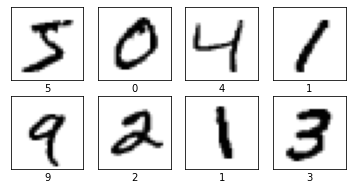

In [45]:
X_t = train_data.drop(["label"], axis=1)
Y_t = train_data.label.values

plt.figure(figsize=(6,3))
X = X_t.to_numpy().reshape(60000, 28, 28)
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(str(Y_t[i]))
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='label'>

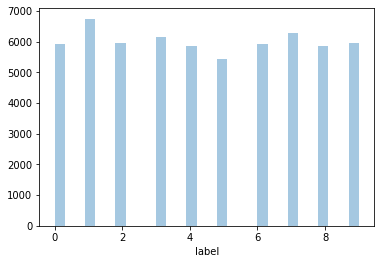

In [46]:
sns.distplot(train_data['label'], kde = False, bins = 30)

In [47]:
train_data = train_data[(train_data.label == 1) | (train_data.label == 3)]
test_data = test_data[(test_data.label == 1) | (test_data.label == 3)]

In [48]:
# Create a representative sample of the data set
train_data = train_data.sample(n = 2000, replace = False) 
test_data = test_data.sample(n = 2000, replace = False) 

In [49]:
# Remove duplicated columns 
train_data = train_data.loc[:,~train_data.columns.duplicated()]
test_data = test_data.loc[:,~test_data.columns.duplicated()]

In [50]:
def _remove_columns_unique_values(data):
    
    nunique = data.apply(pd.Series.nunique)
    cols_to_drop = nunique[nunique == 1].index
    
    return data.drop(cols_to_drop, axis=1)

test_data = _remove_columns_unique_values(test_data)
train_data = _remove_columns_unique_values(train_data)

In [51]:
# Check column overlap
print(test_data.columns.difference(train_data.columns))
print(train_data.columns.difference(test_data.columns))

Index(['11x25', '12x25', '14x25', '15x25', '18x26', '20x27', '21x27', '24x2',
       '26x4', '27x10', '27x8', '27x9', '28x10', '28x11', '28x13', '28x9',
       '3x10', '3x11', '3x12', '3x13', '4x24', '4x25', '4x6', '5x4', '6x2',
       '9x2'],
      dtype='object')
Index(['10x26', '10x27', '11x26', '11x27', '12x26', '12x27', '12x3', '13x26',
       '13x27', '13x3', '14x26', '14x27', '15x4', '17x2', '18x2', '19x2',
       '20x26', '21x26', '22x1', '22x2', '22x26', '23x1', '23x2', '23x25',
       '23x26', '25x26', '25x27', '25x3', '3x17', '3x18', '7x3'],
      dtype='object')


In [52]:
# Retain only columns that exist in the test data set
train_data = train_data.drop(train_data.columns.difference(test_data.columns), axis=1)
test_data = test_data.drop(test_data.columns.difference(train_data.columns), axis=1)

In [53]:
# Verfiy the data type 
train_data.dtypes.unique()

array([dtype('int64')], dtype=object)

In [54]:
# Remove missing targets
train_data = train_data[train_data.label.notnull()]

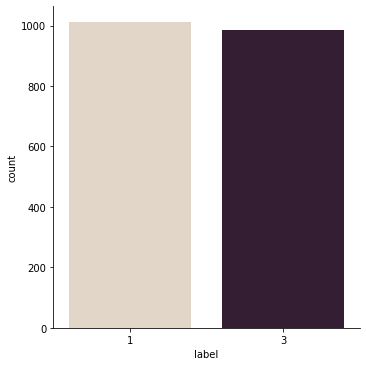

In [55]:
# Analyse the distribution of the target
import seaborn as sns
sns.catplot(x="label", kind="count", palette="ch:.25", data=train_data)

In [56]:
train_data.std().sort_values(ascending=False).head(10)

18x14    116.269317
17x15    115.270835
17x14    115.003968
18x15    114.507369
19x14    113.624835
8x19     113.324203
23x11    113.276335
7x14     113.242485
23x10    112.862697
23x16    112.852084
dtype: float64

In [57]:
train_data = train_data.iloc[:, : 50] # Train on first 50 columns

In [58]:
train_data.describe()

,label,3x14,3x15,3x16,4x7,4x8,4x9,4x10,4x11,4x12,...,5x24,5x25,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1.987000,0.119000,0.193500,0.247000,0.037500,0.239000,0.418000,0.923000,1.44350,2.210500,...,0.686000,0.176500,0.038000,0.20150,0.823000,2.856000,6.795500,14.032500,24.00400,37.075500
std,1.000166,5.321842,5.670903,7.811178,1.677051,7.238513,8.441795,12.323839,15.60896,19.847397,...,10.959446,5.872954,1.699412,4.16396,12.236443,21.749708,35.355292,50.501511,65.56903,79.354177
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,3.000000,238.000000,182.000000,253.000000,75.000000,255.000000,253.000000,253.000000,253.00000,254.000000,...,248.000000,253.000000,76.000000,136.00000,252.000000,255.000000,255.000000,255.000000,255.00000,255.000000


In [59]:
train_data.isnull().sum()

label    0
3x14     0
3x15     0
3x16     0
4x7      0
4x8      0
4x9      0
4x10     0
4x11     0
4x12     0
4x13     0
4x14     0
4x15     0
4x16     0
4x17     0
4x18     0
4x19     0
4x20     0
4x21     0
4x22     0
4x23     0
5x5      0
5x6      0
5x7      0
5x8      0
5x9      0
5x10     0
5x11     0
5x12     0
5x13     0
5x14     0
5x15     0
5x16     0
5x17     0
5x18     0
5x19     0
5x20     0
5x21     0
5x22     0
5x23     0
5x24     0
5x25     0
6x3      0
6x4      0
6x5      0
6x6      0
6x7      0
6x8      0
6x9      0
6x10     0
dtype: int64

<AxesSubplot:>

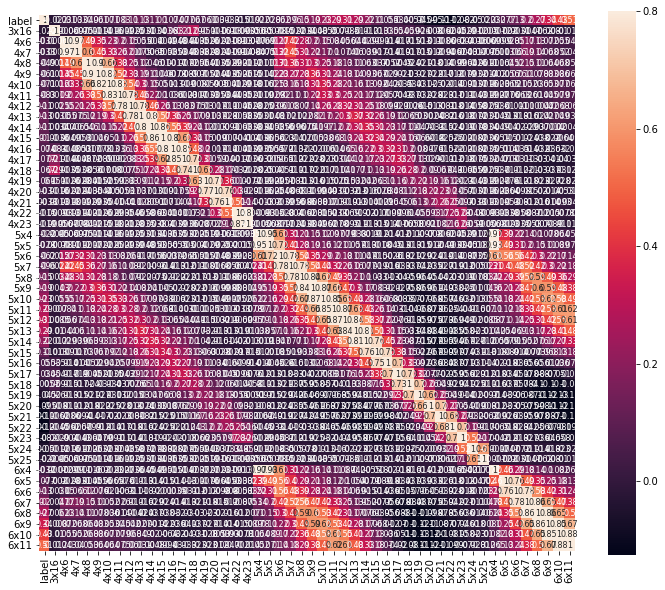

In [21]:
corrmat = train_data.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,
            vmax=0.8,
            square=True,
            annot=True,
            annot_kws={'size':8})

In [60]:
# Feature Engineering 
## Discretise continuous variables 
## Create a set of randomised features 
import random

random.seed(1234)
train_data['uniform_random'] = np.random.uniform(0,1,len(train_data))
train_data['log_norm_random'] = np.random.lognormal(0, 1, len(train_data))
train_data['norm_random'] = np.random.normal(0, 1, len(train_data))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [61]:
# spot check machine learning algorithms on the adult imbalanced dataset
# https://machinelearningmastery.com/imbalanced-classification-with-the-adult-income-dataset/
from numpy import mean
from numpy import std
from matplotlib import pyplot

from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

In [62]:
# Establish X and y & label encode the target variable to have the classes 0 and 1
train_data.label = np.where(train_data.label == 1, 0, 1) # 0 == 1 and 1 == 3
y = LabelEncoder().fit_transform(train_data.label)
X = train_data.drop('label', 1)
#num_ix = X.select_dtypes(include=['int64', 'float64']).columns

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [63]:
# Create a benchmark dummy model
random.seed(1234)

def _generate_dummy_model(X=X, y=y):
    # Normalisation/Standardisation --- Implement Feature Scaling
    X_scaled = scale(X)

    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.2, random_state = 10)

    for strat in ['stratified', 'most_frequent', 'prior', 'uniform']:
        dummy_maj = DummyClassifier(strategy=strat).fit(X_train, y_train)
        print(strat)
        print("Train Stratergy :{} \n Score :{:.2f}".format(strat, dummy_maj.score(X_train, y_train)))
        print("Test Stratergy :{} \n Score :{:.2f}".format(strat, dummy_maj.score(X_train, y_train)))
        print("Cross Validation: Training Data \n ", cross_val_score(dummy_maj, X_train, y_train, cv = 10, scoring = 'accuracy'))
        print("""""")
        
_generate_dummy_model()

stratified
Train Stratergy :stratified 
 Score :0.49
Test Stratergy :stratified 
 Score :0.54
Cross Validation: Training Data 
  [0.525 0.475 0.5   0.35  0.6   0.45  0.6   0.525 0.475 0.65 ]

most_frequent
Train Stratergy :most_frequent 
 Score :0.50
Test Stratergy :most_frequent 
 Score :0.50
Cross Validation: Training Data 
  [0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.525]

prior
Train Stratergy :prior 
 Score :0.50
Test Stratergy :prior 
 Score :0.50
Cross Validation: Training Data 
  [0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.525]

uniform
Train Stratergy :uniform 
 Score :0.50
Test Stratergy :uniform 
 Score :0.49
Cross Validation: Training Data 
  [0.575 0.575 0.325 0.425 0.475 0.4   0.525 0.55  0.525 0.55 ]



In [64]:
# Define models to test: Support Vector Machine 
def get_models():
    models, names = list(), list()
    
    # DummyClassifier
    models.append(DummyClassifier(strategy='most_frequent')) # Best performing dummy classifier
    names.append('Dummy_MostFreq')
    
    # Stochastic Gradient Descent Classifier (This should be equal to )
    models.append(SGDClassifier(loss="hinge", penalty="l2"))
    names.append('SGD_Classifier')
    
    # SVM Linear Kernel
    models.append(SVC(kernel='linear'))
    names.append('SVM_Linear')
    
    # SVM
    #models.append(SVC(kernel='rbf', gamma='scale'))
    #names.append('SVM_Gamma')
    
    # GBM
    models.append(GradientBoostingClassifier(n_estimators=100))
    names.append('GBM')
    
    return models, names

In [65]:
# evaluate each model
models = get_models()[0]
names = get_models()[1]

train_results = []
test_results = []

y_preds_train = []
y_preds_test = []

def _generate_model_results(algorithm=models, model_name=names, predictors=X, target=y):
    
    # Normalisation/Standardisation --- Implement Feature Scaling
    X_scaled = scale(X)
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2, random_state=10)
    
    
    for i in range(len(models)):    
        # Fit the model -- Function 1
        model = models[i].fit(X_train, y_train)
        print(model)
        

        # Create y_preds 
        y_preds_train = model.predict(X_train)
        y_preds_test = model.predict(X_test)

        X['model_actuals'] = np.hstack([y_train, y_test]) # Actuals 
        X.loc[:, names[i]] = np.hstack([y_preds_train, y_preds_test]) # Model Predictions
        
        
        # Cross Validate and produce results
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
        train_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
        test_scores = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

        train_results.append(train_scores)
        test_results.append(test_scores)

        print("""Train Results""")
        print('> %s %.3f (%.3f)' % (model, mean(train_scores), std(train_scores)))
        print(train_scores)
        print("Train Data Accuracy:", metrics.accuracy_score(y_true=y_train, y_pred=y_preds_train), "\n")

        print("""Testing Results""")
        print('> %s %.3f (%.3f)' % ('Model', mean(test_scores), std(test_scores)))
        print(test_scores)
        print("Test Data Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_preds_test), "\n")
        
    # plot the results
    plt.boxplot(train_results, labels=names, showmeans=True)
    plt.show()
        
    # Save Results into Folder
    X.to_csv('/Users/Rej1992/Documents/GitHub/SupportVectorMachines/Results/BaselineModelResults.csv')  
        
    return X#, y_test, y_preds_test

DummyClassifier(strategy='most_frequent')
Train Results
> DummyClassifier(strategy='most_frequent') 0.503 (0.008)
[0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.525]
Train Data Accuracy: 0.5025 

Testing Results
> Model 0.507 (0.002)
[0.5125  0.5125  0.50625 0.50625 0.50625 0.50625 0.50625 0.50625 0.50625
 0.50625]
Test Data Accuracy: 0.5075 

SGDClassifier()
Train Results
> SGDClassifier() 0.627 (0.073)
[0.625 0.675 0.675 0.725 0.625 0.575 0.6   0.725 0.575 0.475]
Train Data Accuracy: 0.6975 

Testing Results
> Model 0.674 (0.046)
[0.7375  0.575   0.6375  0.6875  0.7     0.73125 0.675   0.6875  0.675
 0.63125]
Test Data Accuracy: 0.693125 

SVC(kernel='linear')
Train Results
> SVC(kernel='linear') 0.698 (0.066)
[0.7   0.725 0.775 0.725 0.625 0.625 0.75  0.8   0.6   0.65 ]
Train Data Accuracy: 0.7225 

Testing Results
> Model 0.736 (0.034)
[0.8125  0.7     0.74375 0.7625  0.69375 0.75    0.74375 0.70625 0.70625
 0.7375 ]
Test Data Accuracy: 0.734375 

GradientBoostingClassifi

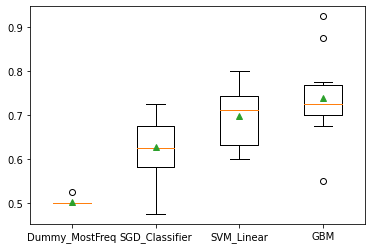

,3x14,3x15,3x16,4x7,4x8,4x9,4x10,4x11,4x12,4x13,...,6x9,6x10,uniform_random,log_norm_random,norm_random,model_actuals,Dummy_MostFreq,SGD_Classifier,SVM_Linear,GBM
40427,0,0,0,0,0,0,0,0,0,0,...,0,0,0.538238,1.957275,-1.763163,1,0,0,0,1
37110,0,0,0,0,0,0,0,0,0,0,...,0,0,0.388638,2.366616,0.500568,1,0,1,1,1
26154,0,0,0,0,0,0,0,0,0,0,...,0,0,0.301270,0.165847,0.726670,0,0,0,0,0
46807,0,0,0,0,0,0,0,0,0,0,...,0,0,0.122947,0.333846,-0.304057,0,0,1,0,0
37229,0,0,0,0,0,0,0,0,0,0,...,38,243,0.385600,8.432663,-1.935572,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40374,0,0,0,0,0,0,0,0,0,0,...,0,0,0.701838,1.216405,1.604295,0,0,0,0,0
12329,0,0,0,0,0,0,0,0,0,0,...,0,0,0.449324,3.076849,0.293225,0,0,0,0,0
18615,0,0,0,0,0,0,0,19,149,119,...,254,253,0.157352,1.733373,0.820079,1,0,1,0,0
33458,0,0,0,0,0,0,0,0,0,0,...,0,0,0.794449,1.479112,-1.429549,0,0,0,0,1


In [66]:
_generate_model_results()

In [67]:
# Confusion Matrix -- Function 4
for i in names:
    print(i)
    print(confusion_matrix(X.model_actuals, X[i]))
    print("""""")

Dummy_MostFreq
[[1013    0]
 [ 987    0]]

SGD_Classifier
[[819 194]
 [418 569]]

SVM_Linear
[[979  34]
 [502 485]]

GBM
[[903 110]
 [275 712]]



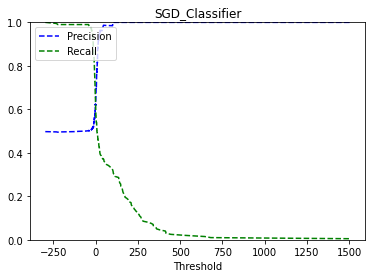

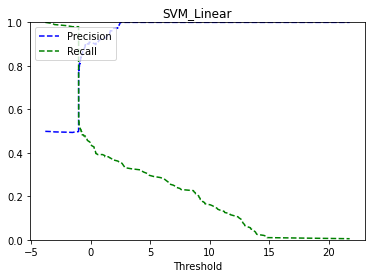

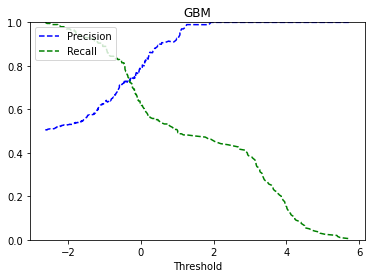

In [68]:
## Precision-Recall Curves
precisions = []
recalls = []
thresholds = []

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

def _generate_precision_recall_results(algorithm=models, predictors=X, target=y, name = names):
    
    # Normalisation/Standardisation --- Implement Feature Scaling
    X_scaled = scale(X)
    
    # Cross Validation Strategy
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2, random_state=10)
    
    for i in range(len(models)):    
        # Fit the model -- Function 1
        model = models[i].fit(X_train, y_train)
        
        if(i != 0):
            y_decision_func = cross_val_predict(model,  X_train, y_train, method='decision_function', cv=cv)
            
            # Create the results for precision and recall
            precisions, recalls, thresholds = precision_recall_curve(y_train, y_decision_func)
            
            # Create a plot
            plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
            plt.title(name[i])
            plt.show()
        
_generate_precision_recall_results()

RoC_AuC_Score:  SGD_Classifier 0.7287432185804645
RoC_AuC_Score:  SVM_Linear 0.7317432935823396
RoC_AuC_Score:  GBM 0.8250706267656691


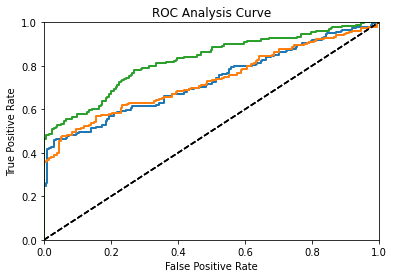

In [69]:
fpr = []
tpr = []
roc_thresholds = []

def plot_roc_curve(fpr, tpr, roc_thresholds, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

def _generate_roc_results(algorithm=models, predictors=X, target=y, name = names):
    
    # Normalisation/Standardisation --- Implement Feature Scaling
    X_scaled = scale(X)
    
    # Cross Validation Strategy
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.2, random_state=10)
    
    for i in range(len(models)):    
        # Fit the model -- Function 1
        model = models[i].fit(X_train, y_train)
        
        # # RoC Curve --- Binary Classifiers & Recall Versus False Positive Rate (Ratio of negative instances that are incorrectly classified as positive)
        if(i != 0):
            y_decision_func = cross_val_predict(model,  X_train, y_train, method='decision_function', cv=cv)
            fpr, tpr, roc_thresholds = roc_curve(y_train, y_decision_func)
            
            print('RoC_AuC_Score: ', name[i],roc_auc_score(y_train, y_decision_func))
            
            plot_roc_curve(fpr, tpr, roc_thresholds)
            #plt.legend(name[i])
            plt.title('ROC Analysis Curve')
            plt.show
        
_generate_roc_results()

In [101]:
#Attempt differing values of C
import pickle

def _save_model_to_pickle(model, model_type):
    filename = dt.datetime.now().strftime('%Y-%m-%d')+'_'+model_type+'_GridSearch_SVM_model.pkl'
    pickle.dump(model, open('/Users/Rej1992/Documents/GitHub/SupportVectorMachines/data/04_models/'+filename, 'wb'))


def _hyperparam_grid_search(model_type):
    # Save Processed Data to Folder
    X.to_csv('/Users/Rej1992/Documents/GitHub/SupportVectorMachines/data/03_processed/'+dt.datetime.now().strftime('%Y-%m-%d')+'_'+'CleanPredictorData.csv')

    # Normalisation/Standardisation --- Implement Feature Scaling
    X_scaled = scale(X)

    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.2, random_state = 10)

    # creating a RepeatedStratifiedKFold object with 10 splits 
    folds = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

    # Grid Search
    # specify range of hyperparameters
    hyper_params = [{'C': [1,5,7,10,15,25,50],
                     'gamma': [.1,.5,.10,.25,.50,1]}]
    
    if(model_type == 'SVM_Linear'):
        model = SVC(kernel='linear')
        print(model)
        
        
    elif(model_type == 'gamma'):
        model = SVC(kernel='rbf')
        print(model)

    model_cv = GridSearchCV(estimator = model, 
                            param_grid = hyper_params, 
                            scoring = 'accuracy', 
                            cv = folds, 
                            verbose = 1,
                            return_train_score=True) 
    
    # Save Model to pickle 
    _save_model_to_pickle(model_cv, model_type)
    
    # fit the model
    model_cv.fit(X_train, y_train)

    print("the parameters {} are the best.".format(model_cv.best_params_))
    print("the best score is {:.2f}.".format(model_cv.best_score_))

    # cv results
    cv_results = pd.DataFrame(model_cv.cv_results_)
    cv_results.to_csv('/Users/Rej1992/Documents/GitHub/SupportVectorMachines/data/05_model_output/'+dt.datetime.now().strftime('%Y-%m-%d')+'_'+model_type+'GridSearchResults.csv')
    
    # Model Score
    scoretrain = model_cv.score(X_train, y_train)
    scoretest  = model_cv.score(X_test, y_test)
    
    #scoretrain.to_csv('/Users/Rej1992/Documents/GitHub/SupportVectorMachines/Results/'+dt.datetime.now().strftime('%Y-%m-%d')+'_'+model_type+'TrainGridSearchResults.csv')
    #scoretest.to_csv('/Users/Rej1992/Documents/GitHub/SupportVectorMachines/Results/'+dt.datetime.now().strftime('%Y-%m-%d')+'_'+model_type+'TestGridSearchResults.csv')
    
    return cv_results, model_cv, scoretrain, scoretest

In [102]:
SVMLinearGridResults = _hyperparam_grid_search('SVM_Linear')

SVC(kernel='linear')
Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


the parameters {'C': 50, 'gamma': 0.1} are the best.
the best score is 0.71.


[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed:   49.1s finished


In [ ]:
SVMLinearGridResults[0] # Save to Results

In [ ]:
GammaGridResults = _hyperparam_grid_search('gamma')[0]

In [ ]:
GammaGridResults['param_C'] = GammaGridResults['param_C'].astype('int')

# plot with various axes scales
plt.figure(figsize=(16,8))

# subplot 1/4
plt.subplot(221)
gamma_01 = GammaGridResults[GammaGridResults['param_gamma']==0.1]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.1")
plt.ylim([0.50, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper right')
plt.xscale('log')


# subplot 2/4
plt.subplot(222)
gamma_025 = GammaGridResults[GammaGridResults['param_gamma']==0.25]

plt.plot(gamma_025["param_C"], gamma_025["mean_test_score"])
plt.plot(gamma_025["param_C"], gamma_025["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.25")
plt.ylim([0.50, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper right')
plt.xscale('log')


# subplot 3/4
plt.subplot(223)
gamma_05 = GammaGridResults[GammaGridResults['param_gamma']==0.5]

plt.plot(gamma_05["param_C"], gamma_05["mean_test_score"])
plt.plot(gamma_05["param_C"], gamma_05["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.5")
plt.ylim([0.50, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper right')
plt.xscale('log')


# Subplot 4/4
plt.subplot(224)
gamma_1 = GammaGridResults[GammaGridResults['param_gamma']==1.0]

plt.plot(gamma_1["param_C"], gamma_1["mean_test_score"])
plt.plot(gamma_1["param_C"], gamma_1["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=1.0")
plt.ylim([0.50, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper right')
plt.xscale('log')

In [125]:
X

,3x14,3x15,3x16,4x7,4x8,4x9,4x10,4x11,4x12,4x13,...,6x9,6x10,uniform_random,log_norm_random,norm_random,model_actuals,Dummy_MostFreq,SGD_Classifier,SVM_Linear,GBM
40427,0,0,0,0,0,0,0,0,0,0,...,0,0,0.538238,1.957275,-1.763163,1,0,0,0,1
37110,0,0,0,0,0,0,0,0,0,0,...,0,0,0.388638,2.366616,0.500568,1,0,1,1,1
26154,0,0,0,0,0,0,0,0,0,0,...,0,0,0.301270,0.165847,0.726670,0,0,0,0,0
46807,0,0,0,0,0,0,0,0,0,0,...,0,0,0.122947,0.333846,-0.304057,0,0,1,0,0
37229,0,0,0,0,0,0,0,0,0,0,...,38,243,0.385600,8.432663,-1.935572,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40374,0,0,0,0,0,0,0,0,0,0,...,0,0,0.701838,1.216405,1.604295,0,0,0,0,0
12329,0,0,0,0,0,0,0,0,0,0,...,0,0,0.449324,3.076849,0.293225,0,0,0,0,0
18615,0,0,0,0,0,0,0,19,149,119,...,254,253,0.157352,1.733373,0.820079,1,0,1,0,0
33458,0,0,0,0,0,0,0,0,0,0,...,0,0,0.794449,1.479112,-1.429549,0,0,0,0,1


In [126]:
#Building and Evaluating the Final Model
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# Normalisation/Standardisation --- Implement Feature Scaling
X_scaled = scale(X) # THIS NEEED TO BE CORRECTED AS CONTAINS FEATURES AND RESULTS

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.2, random_state = 10)

# model with optimal hyperparameters
model = SVC(C=50, gamma=0.1, kernel="rbf")

# Save Model to pickle 
_save_model_to_pickle(model, 'Optimised_rbfKernal_Model')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("Model Accuracy: \n", metrics.accuracy_score(y_test, y_pred), "\n")
print("Confusion Matrix Results: \n", metrics.confusion_matrix(y_test, y_pred), "\n")

### OK TO HERE
# Feature Importance Analysis: Attribute coef_ for SVM classifier but it only works for SVM with linear kernel
features_names = list(X[['3x14', '3x15', '3x16', '4x7', 
                         '4x8', '4x9', '4x10', '4x11', 
                         '4x12', '4x13', '4x14', '4x15', 
                         '4x16', '4x17', '4x18', '4x19', 
                         '4x20', '4x21', '4x22', '4x23', 
                         '5x5', '5x6', '5x7', '5x8', 
                         '5x9', '5x10', '5x11', '5x12', 
                         '5x13', '5x14', '5x15', '5x16', 
                         '5x17', '5x18', '5x19', '5x20',
                         '5x21', '5x22', '5x23', '5x24', 
                         '5x25', '6x3', '6x4', '6x5', 
                         '6x6',  '6x7', '6x8', '6x9', 
                         '6x10', 'uniform_random', 'log_norm_random', 'norm_random']].columns)

linear_svm = SVC(kernel='linear', C=50)
linear_svm.fit(X_train, y_train)
linear_svm.coef_[0]

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
#pd.Series(abs(linear_svm.coef_[0]), index=features_names).nlargest(10).plot(kind='barh')

#f_importances(abs(linear_svm.coef_[0]), feature_names, top=10)

ValueError: Found input variables with inconsistent numbers of samples: [1995, 2000]

In [87]:
## Visualise the model decision boundary 
from matplotlib.colors import ListedColormap

# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

h = .02  # step size in the mesh

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf1 = SVC(C=50, gamma=0.1, kernel="rbf")
    clf1.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min()-.20, X_train[:, 0].max()+.20
    y_min, y_max = X_train[:, 1].min()-.20, X_train[:, 1].max()+.20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernal = linear, Gamma = '%s')"% (50))

plt.show()

ValueError: X.shape[1] = 2 should be equal to 57, the number of features at training time